# Curso ML Credit Scoring

## Aula 1 - Cadeia de Crédito e Risco 

### 1.1 - Lendo a base 

In [1]:
import pandas as pd

In [2]:
dados = pd.read_table('Base.txt',sep=',')

In [3]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


#### Informações da Base

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [5]:
dados.shape

(1000, 21)

In [6]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print('A base de dados tem %s linhas e %s colunas' %(linhas, colunas))

A base de dados tem 1000 linhas e 21 colunas


In [7]:
duplicados = dados.duplicated().sum()

print('A base de dados tem %s dados duplicados' %(duplicados))

A base de dados tem 0 dados duplicados


In [8]:
nulos = dados.isnull().sum()

print('A base de dados tem %s dados nulos' %(nulos))

A base de dados tem default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64 dados nulos


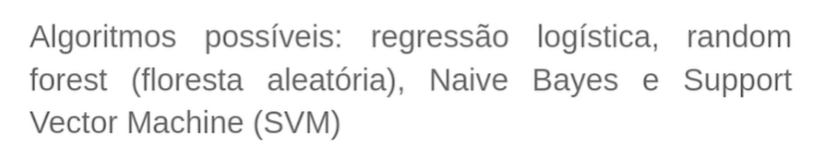

#### Substituindo os valores do tipo Strings:

Como o modelo não entende valores do tipo String, vamos alterá-los para valores inteiros

In [9]:
dados['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

Criando um dicionário e usando o .map() para substituir os valores.

In [10]:
#mudando categoria variavel 'conta_corrente'

a = {'< 0 DM':0, 
     '0 <= ... < 200 DM':1,
     'no checking account':2,
     '>= 200 DM / salary assignments for at least 1 year':3
}

dados['conta_corrente'] = dados['conta_corrente'].map(a)

In [11]:
#mudando categoria variavel 'historico_credito'

a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5     
}
dados['historico_credito'] = dados['historico_credito'].map(a)

In [12]:
#mudando categoria variavel 'reserva_cc'

a = { 'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5     
}
dados['reserva_cc'] = dados['reserva_cc'].map(a)

In [13]:
#mudando categoria variavel 'tempo_emprego_atual'

a = { '.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5     
}
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(a)

In [14]:
#mudando categoria variavel 'sexo_est_civil'

a = { 'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5     
}
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(a)

In [15]:
#mudando categoria variavel 'outros_fiadores'

a = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3    
}
dados['outros_fiadores'] = dados['outros_fiadores'].map(a)

In [16]:
#mudando categoria variavel 'propriedade'

a = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4 
}
dados['propriedade'] = dados['propriedade'].map(a)

In [17]:
#mudando categoria variavel 'outros_planos_financiamento'

a = { 'bank' : 1,
      'stores' : 2,
      'none' : 3 
}

dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(a)

In [18]:
#mudando categoria variavel 'tipo_residencia'

a = { 'rent' : 1,
      'own' : 2,
      'for free' : 3 
}

dados['tipo_residencia'] = dados['tipo_residencia'].map(a)

In [19]:
#mudando categoria variavel 'status_emprego'

a = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
dados['status_emprego'] = dados['status_emprego'].map(a)

In [20]:
#mudando categoria variavel 'telefone'

a = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
dados['telefone'] = dados['telefone'].map(a)

In [21]:
#mudando categoria variavel 'trabalhador_estrangeiro'

a = { 'yes' : 1,
      'no' : 0
}
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(a)

In [22]:
dados['proposito_emprestimo'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [23]:
#mudando categoria variavel 'proposito_emprestimo'

a = {'domestic appliances' : 1,
    '(vacation - does not exist?)' : 2,
     'radio/television':3,
     'car (new)':4,
     'car (used)':5,
     'business':6,
     'repairs':7,
     'education':8,
     'furniture/equipment':9,
     'retraining':10
    
     
}
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(a)

In [24]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,5,1,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,1,48,3,1,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,2,12,5,2,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,0,42,3,3,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1
4,1,0,24,4,4,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,1


## Aula 2 - Regressão Logística

### 2.1 - Criando bases de Treino e Teste

In [25]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,0,6,5,1,1169,1,1,4,3,...,4,1,67,3,2,2,3,1,1,1
1,1,1,48,3,1,5951,5,3,2,2,...,2,1,22,3,2,1,3,1,0,1
2,0,2,12,5,2,2096,5,2,2,3,...,3,1,49,3,2,1,2,2,0,1
3,0,0,42,3,3,7882,5,2,2,3,...,4,2,45,3,3,1,3,2,0,1
4,1,0,24,4,4,4870,5,3,3,3,...,4,4,53,3,3,2,3,2,0,1


Separando a base em Y (coluna default) e X (O restante)

In [26]:
y = dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [27]:
x = dados.drop(columns = 'default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,6,5,1,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,48,3,1,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,2,12,5,2,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,42,3,3,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,0,24,4,4,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1


Importando a biblioteca de Regressão Linear que separa a base em dados de TESTE e TREINO

In [28]:
from sklearn.model_selection import train_test_split

Dividindo em TREINO e TESTE as variáveis X e Y, onde 70% será do treino e 30% do teste

Criando um SEED de 77 para garantir que a separação das bases de teste e treino seja feito da MESMA MANEIRA

In [29]:
SEED = 77
treino_x,teste_x,treino_y,teste_y = train_test_split(x,y,test_size = 0.30, random_state = SEED)

#### Conferindo os treinos e testes 

In [30]:
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de treino tem %s elementos e a base de teste tem %s elementos' %(base_treino,base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos


In [31]:
from sklearn.linear_model import LogisticRegression

Definindo o número de iterações máximas que o modelo irá realizar

In [32]:
modelo = LogisticRegression(max_iter = 1000)

#### Treinando o modelo:

O modelo é uma FUNÇÃO que irá receber os valores de X e os resultados Y esperados para que ele possa entender, ou TREINAR como realizar esses cálculos.

In [33]:
modelo.fit(treino_x, treino_y)

LogisticRegression(max_iter=1000)

Pontuação do nosso modelo:

In [34]:
print(modelo.score(treino_x,treino_y))

0.7442857142857143


## Aula 3 - Métricas Estatísticas

### 3.1 - Acuária de testes

Agora que o modelo já foi treinado, vamos previr os resultados a partir dos dados testes.

In [35]:
previsoes = modelo.predict(teste_x)

Vamos analisar a acurácia do modelo

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia,2)*100
acuracia

80.0

A acuracia foi de 80%

### 3.2 - Matriz de Confusão

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

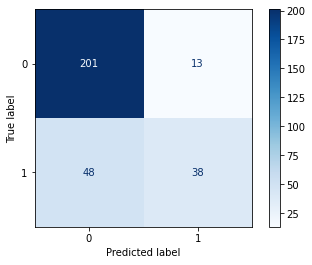

In [39]:
matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap = 'Blues',values_format = '.3g')

A matriz de confusão é uma matriz 2x2 que exibe valores sobre o modelo.

- VERDADEIROS POSITIVOS (VP): O primeiro quadrante indica que o modelo RECEBEU dados e PREVEU de acordo com o ESPERADO. Exemplo: Deu uma imagem de cachorro, passou para o classificador do modelo e ele deu como resposta o cachorro. 

- FALSOS POSITIVOS (FP): O segundo quadrante indica que o modelo RECEBEU dados e PREVEU de forma ERRÔNEA. Exemplo: Ou seja, recebe a imagem de um gato e classifica como cachorro. No nosso modelo: bom pagador virou como um mau pagador.

- FALSOS NEGATIVOS (FN): O terceiro quadrante indica que o modelo também recebeu os dados e preveu de forma errada. Exemplo: Recebeu a imagem de um cachorro e classificou como um gato.

- VERDADEIROS NEGATIVOS (VN): O quarto quadrante indica que o modelo RECEBEU os dados e PREVEU os dados ERRADOS. Ou seja, recebeu a imagem de um gato e preveu que aquilo NÃO é um cachorro. Ou seja, é como se ele visse um mau pagador e classifica-se como um MAU pagador.

Ou seja, o modelo teve 201+38 previsões corretas, ou seja 239 previsões corretas.

### 3.3 - Classification Report

In [40]:
from sklearn.metrics import classification_report

Vamos passar para a função classification_report os valores do teste_y (que são os dados testes do nosso modelo) e os valores da previsão (o que a regressão linear tentou prever de acordo com os valores de teste_x depois de treinado)

In [41]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       214
           1       0.75      0.44      0.55        86

    accuracy                           0.80       300
   macro avg       0.78      0.69      0.71       300
weighted avg       0.79      0.80      0.78       300



Ou seja, como nosso modelo tem 80% de acuracia, ele irá acertar 80% do perfil dos pagadores

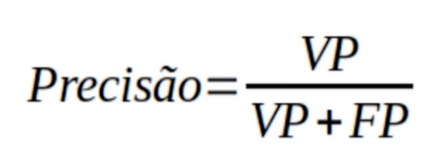

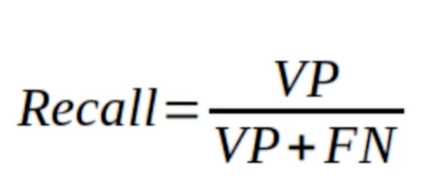

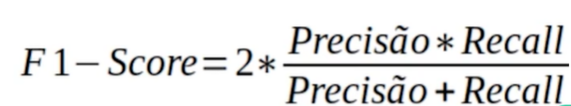

F1-Score é a média harmônica entre precisão e recall, um resumo dos parâmetros

### Support: Quantidade ABSOLUTA

Ou seja, o modelo apresentou:

- Acurácia de 80%
- Precisão de 81% de VP, FP e 75% de FN, VN
- Recall de 94% de VP, FP, e 44% de FN, VN
- F1-Score de 87% de VP,FP e 55% de FN,VN

### 3.4 - Plotando a curva ROC

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

Aqui ele irá trazer um ARRAY mostrando qual a probabilidade do evento ser previsto como 1 ou 0

In [43]:
prob_previsao = modelo.predict_proba(teste_x)[:,1]

tfp = Taxa de Falsos Positivos
tvp = Taxa de Verdadeiros Positivos

roc_curve = definir a curva ROC
roc_auc_socre = Área sobre a curva (integral de linha)

In [44]:
tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print ('roc_auc', roc_auc_score(teste_y, prob_previsao))

roc_auc 0.8059117583134102


([<matplotlib.lines.Line2D at 0x261fae8faf0>],
 [<matplotlib.lines.Line2D at 0x261fae8feb0>])

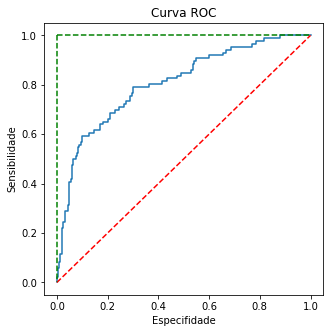

In [45]:
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot (tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde

 #### Entendendo a curva ROC

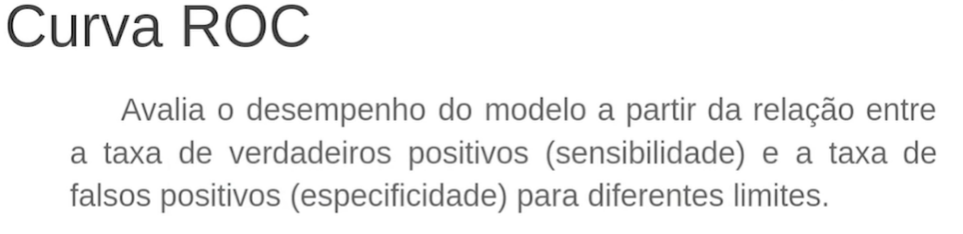

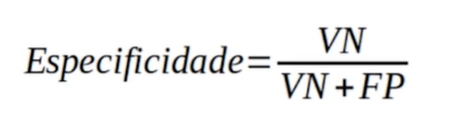

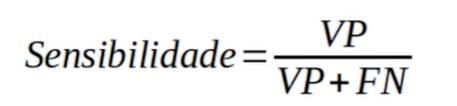

- Sensibilidade: Indica a taxa de casos em que a categoria alvo (1) foi classificada corretamentre como 1


- Especificidade: Indica a taxa de casos em que a categoria (0) foi classificada de maneira errada como 1

Linha verde indica o modelo PERFEITO, ou seja, todas as previsões estão corretas

Linha Vermelha, não segue nenhuma tendência de dados, totalmente aleatória

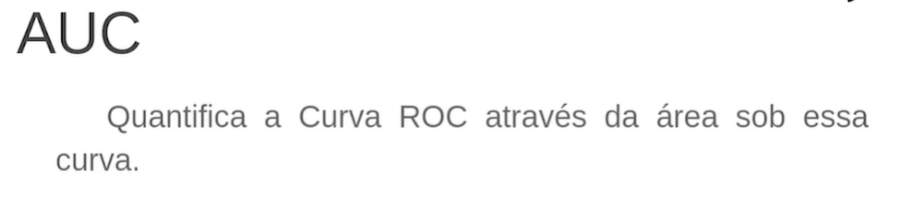

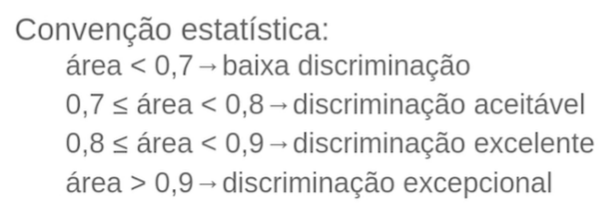

## Aula 4 - Análise e visualização dos dados

### 4.1 - Análise descritiva

In [46]:
variaveis_analise = ['sexo_est_civil','idade','prazo_emprestimo_meses','valor_emprestimo','default']
dados[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.68200,35.546000,20.903000,3271.258000,0.300000
std,0.70808,11.375469,12.058814,2822.736876,0.458487
min,1.00000,19.000000,4.000000,250.000000,0.000000
25%,2.00000,27.000000,12.000000,1365.500000,0.000000
50%,3.00000,33.000000,18.000000,2319.500000,0.000000
75%,3.00000,42.000000,24.000000,3972.250000,1.000000
max,4.00000,75.000000,72.000000,18424.000000,1.000000


In [47]:
#homem = categorias 1,3,4
#mulheres = categorias 2,5

In [48]:
dados['sexo_est_civil'].value_counts()

3    548
2    310
4     92
1     50
Name: sexo_est_civil, dtype: int64

Tem-se 310 mulheres e 690 homens

In [49]:
dados['default'].value_counts()

0    700
1    300
Name: default, dtype: int64

0 créditos negados e 1 créditos concedidos. Ou seja, negou mais do que aprovou crédito

### 4.2 - Histograma

In [50]:
import seaborn as sns

Colunas que quero avaliar:

In [51]:
histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

Enumerando as colunas que quero visualizar

In [52]:
lista_hist = list(enumerate(histogramas))

In [53]:
lista_hist

[(0, 'sexo_est_civil'), (1, 'prazo_emprestimo_meses'), (2, 'default')]

laço de repetição para criar os histogramas:

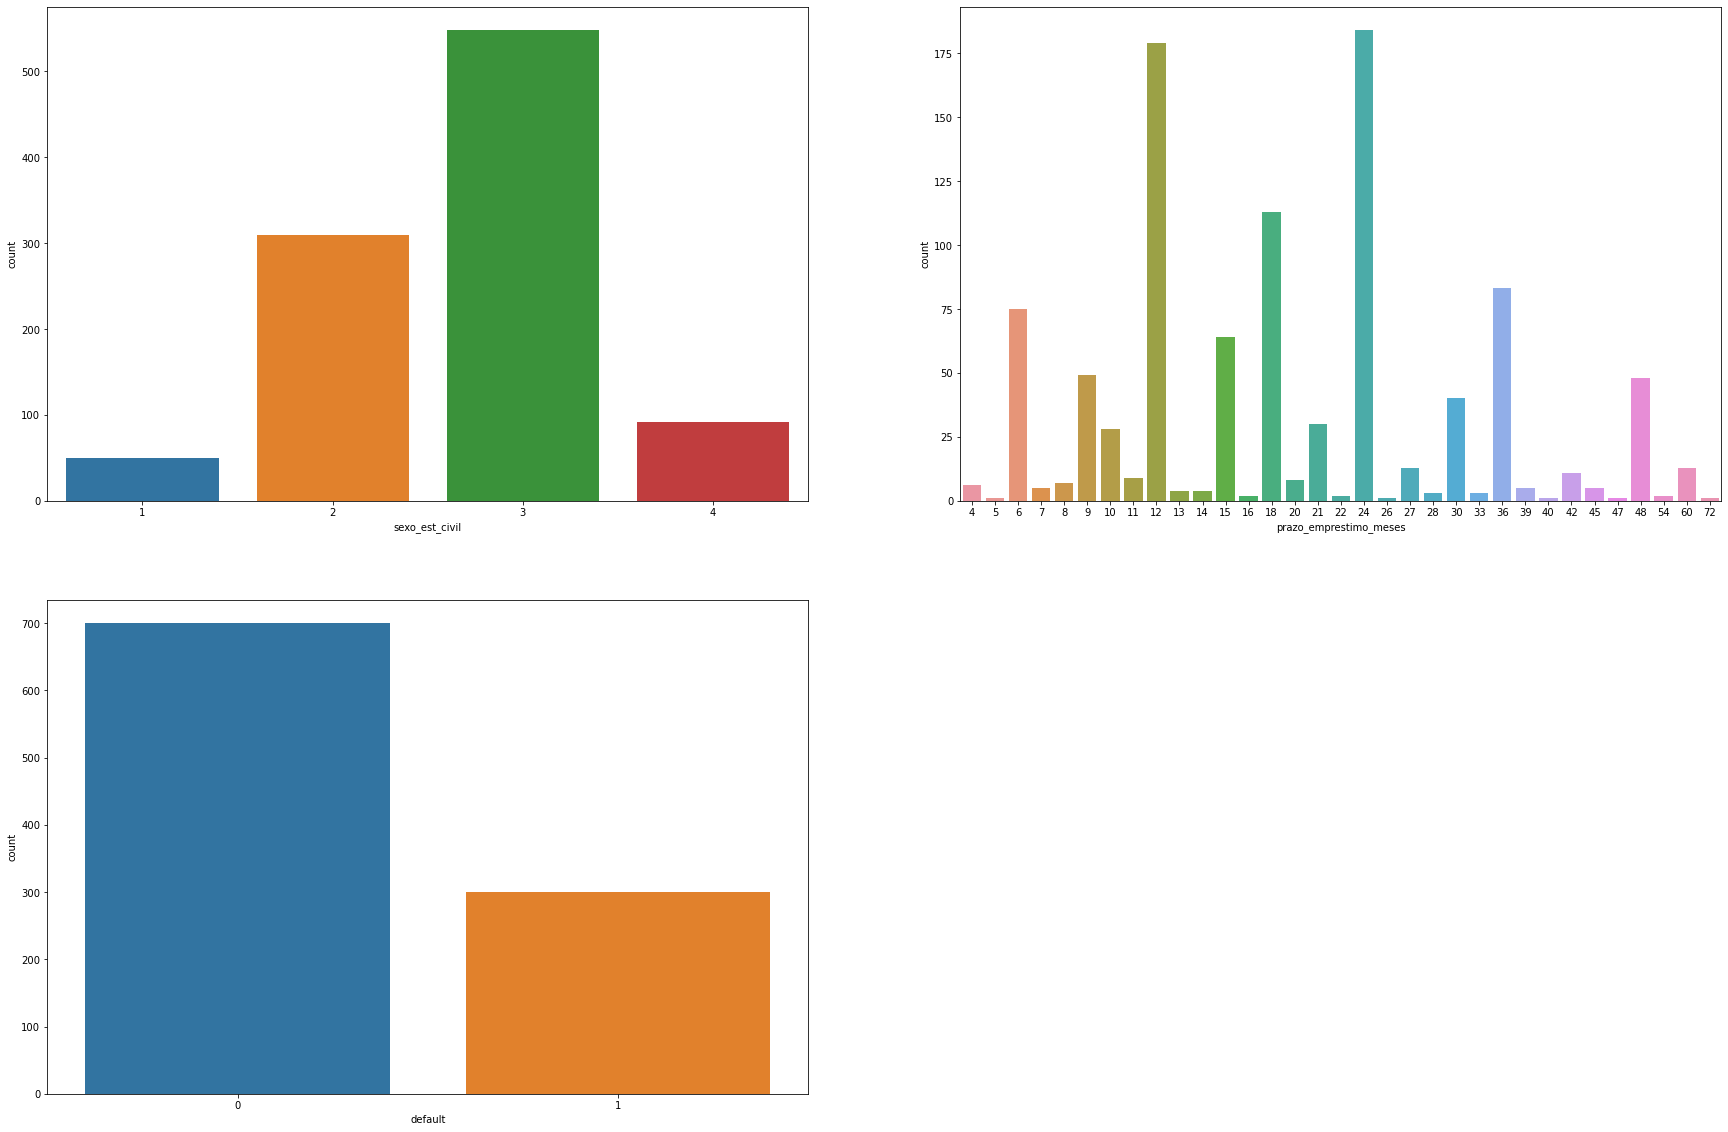

In [54]:
plt.figure(figsize = (30,20))

for i in lista_hist:
    plt.subplot(2,2,i[0]+1) #2 linhas, 2 colunas e quantos gráficos plotaremos (1+ outros da listas...)
    sns.countplot(x = i[1], data = dados)

### 4.3 - Boxplot e Barras

Text(0.5, 1.0, 'Ditribuição de Idade por sexo e estado civil')

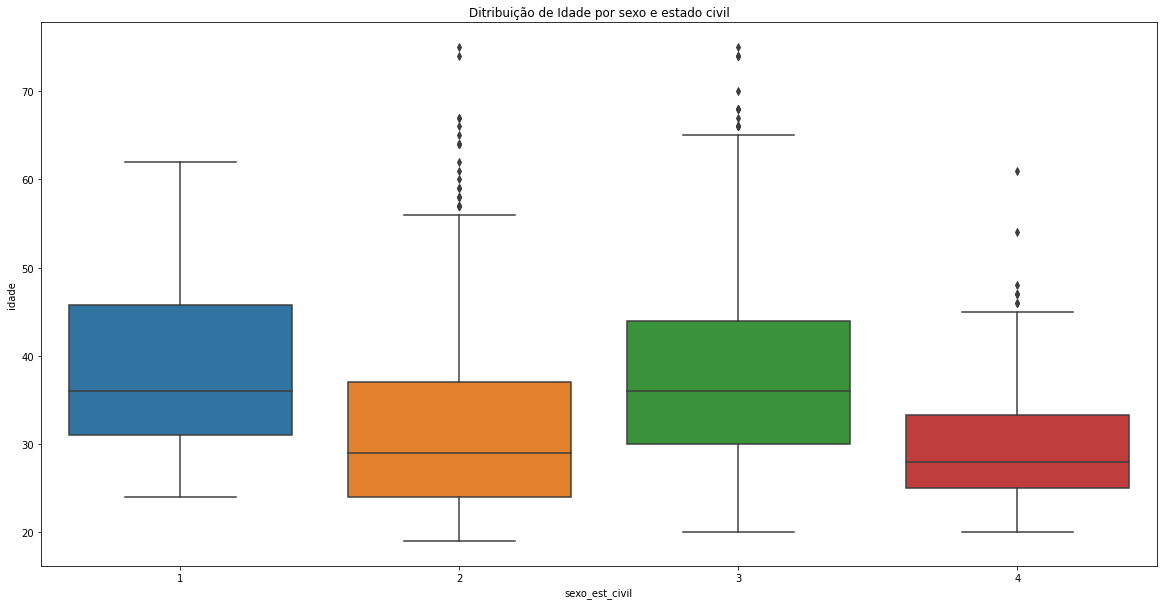

In [55]:
plt.figure(figsize = (20,10))

sns.boxplot(x='sexo_est_civil', y='idade', data = dados)
plt.title('Ditribuição de Idade por sexo e estado civil')

Text(0.5, 1.0, 'Valor de empréstimo x Prazo de empréstimo em meses')

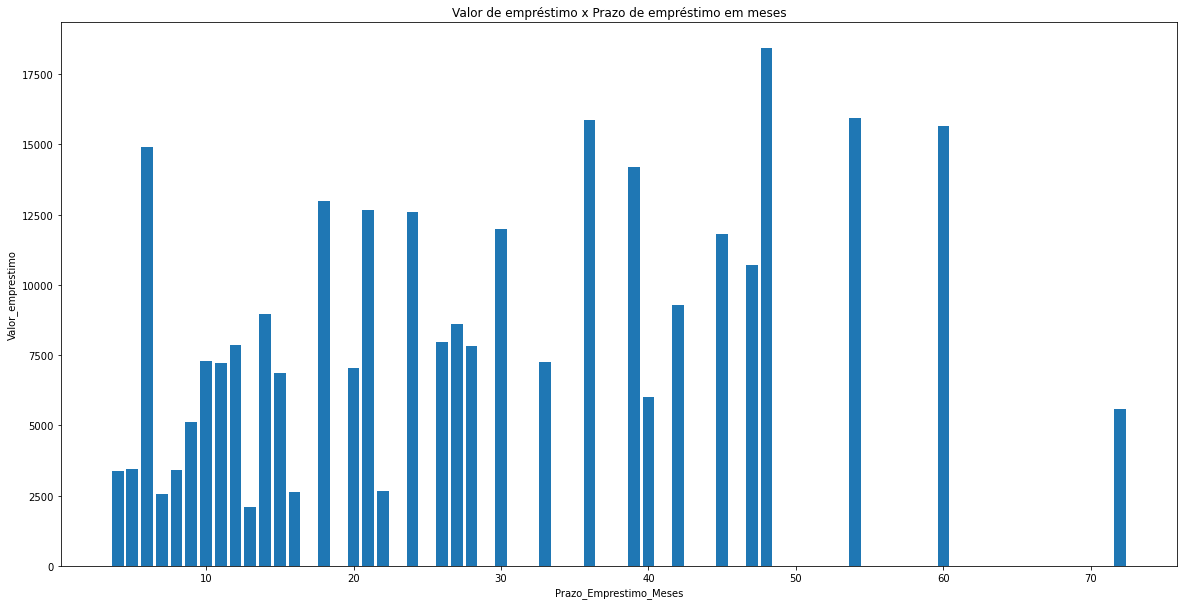

In [56]:
plt.figure(figsize = (20,10))
plt.bar(dados.prazo_emprestimo_meses,dados.valor_emprestimo)
plt.xlabel('Prazo_Emprestimo_Meses')
plt.ylabel('Valor_emprestimo')
plt.title('Valor de empréstimo x Prazo de empréstimo em meses')

## Aula 5 - Comparação e Escolha do Modelo

### 5.1 - Separação de variáveis

Algumas informações são sensíveis para a concessão de crédito, então para isso iremos resumir as características das pessoas em masculino e feminimo e solteiro ou não.

In [57]:
#male: divorced/separated = 1
#female: divorced/separated/married = 2
#male: single = 3
#male: married/widowed = 4
#female: single = 5

#1=mulher
#0=homem

#1=solteiro
#0 - casado/divorciado/viuvo

In [58]:
dic_sexo = {2:1,5:1,1:0,3:0,4:0}
dic_est_civil = {3:1,5:1,1:0,2:0,4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,0,6,5,1,1169,1,1,4,3,...,67,3,2,2,3,1,1,1,0,1
1,1,1,48,3,1,5951,5,3,2,2,...,22,3,2,1,3,1,0,1,1,0
2,0,2,12,5,2,2096,5,2,2,3,...,49,3,2,1,2,2,0,1,0,1
3,0,0,42,3,3,7882,5,2,2,3,...,45,3,3,1,3,2,0,1,0,1
4,1,0,24,4,4,4870,5,3,3,3,...,53,3,3,2,3,2,0,1,0,1


### 5.2 - Ajuste do Modelo

A ideia agora é criar uma função onde podemos fazer as etapas de modelagem e validação do modelo várias vezes para comparação

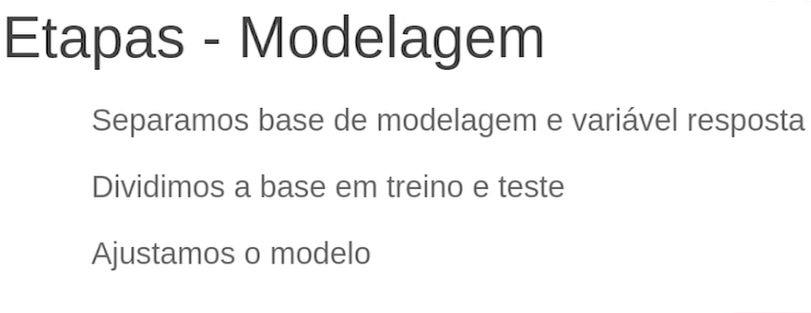

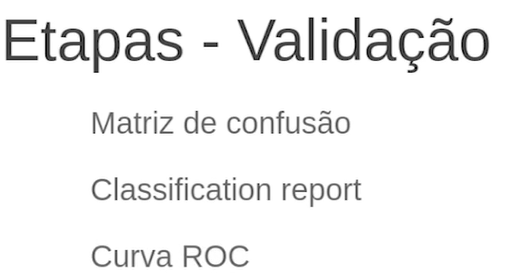

In [59]:
#Definindo a função, que recebe a base de dados e o classificador

def roda_modelo(base_dados,classificador):
    y = base_dados['default'] #definindo a coluna do y
    x = base_dados.drop(columns = 'default') #definindo as colunas do x
    
    #Separando em treino e teste
    SEED = 77
    treino_x,teste_x,treino_y,teste_y = train_test_split(x, y, test_size = 0.30, random_state = SEED)
    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino,base_teste))
    print(100*'-')
    
    #Ajustando o modelo como base de teste
    modelo = classificador
    modelo.fit(treino_x,treino_y)
    
    #Matriz Confusão
    matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format = '3g', cmap = 'Blues')
    plt.title('Matriz de Confusão')
    plt.show
    
    #Classification Report
    previsoes = modelo.predict(teste_x)
    print(100*'-')
    print('/nClassification Report:')
    print(classification_report(teste_y,previsoes))
    
    #Curva ROC e AUC
    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
    tfp,tvp,limite = roc_curve(teste_y,prob_previsao)
    print('roc_auc:',roc_auc_score(teste_y, prob_previsao))
    

    plt.figure(figsize = (5,5))
    plt.title('Curva ROC')
    plt.plot(tfp,tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()
    
    return modelo,matriz_confusao

### Rodando a função:


A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       214
           1       0.78      0.47      0.58        86

    accuracy                           0.81       300
   macro avg       0.80      0.71      0.73       300
weighted avg       0.81      0.81      0.79       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.8095522712453813


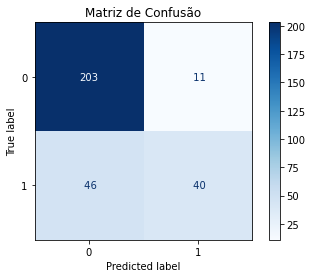

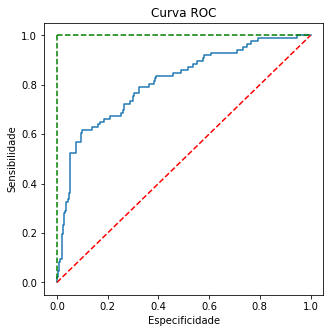

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x261fae66cd0>)

In [60]:
roda_modelo(dados, LogisticRegression(max_iter = 1000))

In [61]:
#Função para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil
0,0,0,6,5,1,1169,1,1,4,1,...,1,67,3,2,2,3,1,1,1,1
1,1,1,48,3,1,5951,5,3,2,1,...,1,22,3,2,1,3,1,0,1,0
2,0,2,12,5,2,2096,5,2,2,1,...,1,49,3,2,1,2,2,0,1,1
3,0,0,42,3,3,7882,5,2,2,3,...,2,45,3,3,1,3,2,0,1,1
4,1,0,24,4,4,4870,5,3,3,1,...,4,53,3,3,2,3,2,0,1,1


### Testando o modelo sem as colunas de Sexo e Estado civil

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       214
           1       0.78      0.49      0.60        86

    accuracy                           0.81       300
   macro avg       0.80      0.72      0.74       300
weighted avg       0.81      0.81      0.80       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.80564007824386


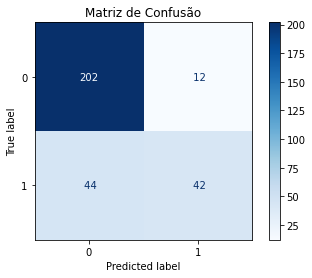

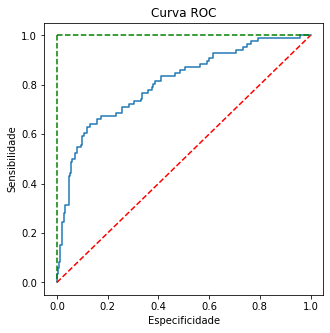

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x261fbcd9fa0>)

In [62]:
roda_modelo(base_dados, LogisticRegression(max_iter = 1000))

### 5.3 - Faixas de classificação

In [69]:
# Criando faixas de idade 

# 18-30 = 1
#31-40 = 2
#41-50 = 3
#51-60 = 4
#61-70 = 5
#71-80 = 6

# Prazo de empréstimo

#01-12 = 1
#13-24 = 2
#25-36 = 3
#37-48 = 4
#49-69 = 5
#70-72 = 6

# Faixa do empréstimo
#1-1000=1
#1001-2000=2
#...
#19001-20000=20

In [65]:
dados['faixa_idade'] = pd.cut(x = dados['idade'], bins = [18,30,40,50,60,70,80], labels = [1,2,3,4,5,6])

In [66]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,0,6,5,1,1169,1,1,4,3,...,3,2,2,3,1,1,1,0,1,5
1,1,1,48,3,1,5951,5,3,2,2,...,3,2,1,3,1,0,1,1,0,1
2,0,2,12,5,2,2096,5,2,2,3,...,3,2,1,2,2,0,1,0,1,3
3,0,0,42,3,3,7882,5,2,2,3,...,3,3,1,3,2,0,1,0,1,3
4,1,0,24,4,4,4870,5,3,3,3,...,3,3,2,3,2,0,1,0,1,4


In [67]:
dados['faixa_emprestimo'] = pd.cut(x = dados['prazo_emprestimo_meses'], bins = [1,12,24,36,48,60,72], labels = [1,2,3,4,5,6])

In [68]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_emprestimo
0,0,0,6,5,1,1169,1,1,4,3,...,2,2,3,1,1,1,0,1,5,1
1,1,1,48,3,1,5951,5,3,2,2,...,2,1,3,1,0,1,1,0,1,4
2,0,2,12,5,2,2096,5,2,2,3,...,2,1,2,2,0,1,0,1,3,1
3,0,0,42,3,3,7882,5,2,2,3,...,3,1,3,2,0,1,0,1,3,4
4,1,0,24,4,4,4870,5,3,3,3,...,3,2,3,2,0,1,0,1,4,2


In [70]:
dados['faixa_valor_emprestimo'] = pd.cut(x = dados['valor_emprestimo'], bins = [1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000], labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [71]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_emprestimo,faixa_valor_emprestimo
0,0,0,6,5,1,1169,1,1,4,3,...,2,3,1,1,1,0,1,5,1,2
1,1,1,48,3,1,5951,5,3,2,2,...,1,3,1,0,1,1,0,1,4,6
2,0,2,12,5,2,2096,5,2,2,3,...,1,2,2,0,1,0,1,3,1,3
3,0,0,42,3,3,7882,5,2,2,3,...,1,3,2,0,1,0,1,3,4,8
4,1,0,24,4,4,4870,5,3,3,3,...,2,3,2,0,1,0,1,4,2,5


Retirando essas informações para não influenciar o modelo na escolha da concessão de crédito

In [72]:
#Função para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_emprestimo,faixa_valor_emprestimo
0,0,0,5,1,1,1,4,1,4,1,...,2,2,3,1,1,1,1,5,1,2
1,1,1,3,1,5,3,2,1,2,1,...,2,1,3,1,0,1,0,1,4,6
2,0,2,5,2,5,2,2,1,3,1,...,2,1,2,2,0,1,1,3,1,3
3,0,0,3,3,5,2,2,3,4,2,...,3,1,3,2,0,1,1,3,4,8
4,1,0,4,4,5,3,3,1,4,4,...,3,2,3,2,0,1,1,4,2,5


A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
/nClassification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       214
           1       0.74      0.43      0.54        86

    accuracy                           0.79       300
   macro avg       0.77      0.68      0.71       300
weighted avg       0.79      0.79      0.77       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7868941534449032


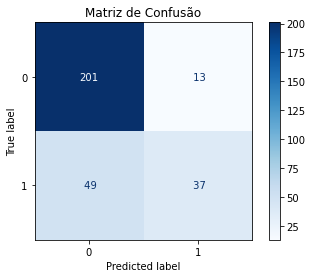

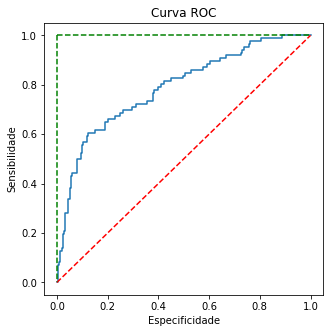

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x261fadb0be0>)

In [73]:
roda_modelo(base_dados, LogisticRegression(max_iter = 1000))

### 5.4 - Comparando Modelos

Primeiro modelo com todas as colunas:

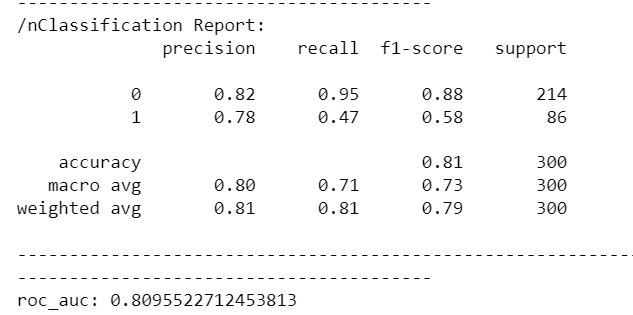

Segundo modelo sem as variáveis sexo e sexo_est_civil

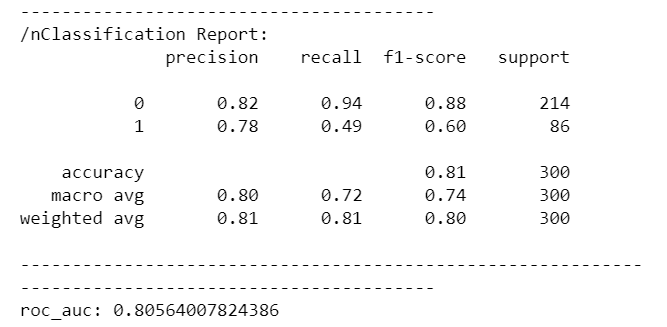

Terceiro modelo sem as variáveis sexo, sexo_est_civil, e as variáveis absolutas

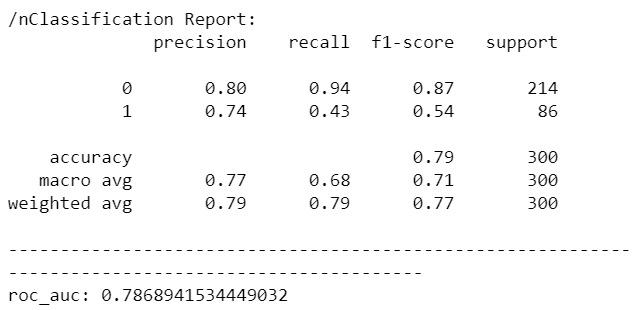

O terceiro modelo será o escolhido para esse banco estudado, podendo ser um pouco mais conservador no fornecimento de crédito.

### 5.5 - Treinando o modelo com a base inteira

Não há necessidade de separar mais o modelo em treino e teste, e sim testar já para a base completa

In [74]:
#Função para retirar colunas da base de dados

colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_emprestimo,faixa_valor_emprestimo
0,0,0,5,1,1,1,4,1,4,1,...,2,2,3,1,1,1,1,5,1,2
1,1,1,3,1,5,3,2,1,2,1,...,2,1,3,1,0,1,0,1,4,6
2,0,2,5,2,5,2,2,1,3,1,...,2,1,2,2,0,1,1,3,1,3
3,0,0,3,3,5,2,2,3,4,2,...,3,1,3,2,0,1,1,3,4,8
4,1,0,4,4,5,3,3,1,4,4,...,3,2,3,2,0,1,1,4,2,5


In [76]:
modelo = LogisticRegression(max_iter = 1000)
y = base_dados['default']
x = base_dados.drop(columns = 'default')
modelo.fit(x,y)

LogisticRegression(max_iter=1000)

Mesmo após comparar dois algoritmos e escolher qual é o melhor, ainda existe espaço para explorar os algoritmos e encontrar o melhor modelo, faremos isso através dos hiperparâmetros.

Os hiperparâmetros são parâmetros do nosso modelo que definimos antes do treinamento dos dados, por exemplo o DecisionTreeClassifier conta com parâmetros max_depth e min_samples_split que dependendo do valor vão te entregar um modelo melhor adaptado aos seus dados.